In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
dpi = 120

In [4]:
data_address = '../Data/'
df_clusters_orig = pd.read_csv(data_address + 'massive_clusters.csv', 
                          usecols = ['x[kpc/h]', 'y[kpc/h]', 'z[kpc/h]', 'm500c[Msol/h]', 'vx[km/s]', 'vy[km/s]', 'vz[km/s]' ])  #massive_clusters.csv contains clusters with M_500c greater than 10^13.5 h^{-1} M_sun as done by Tanimura et al. (2020)

df_clusters_orig.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,6080.000000,6080.000000,6080.000000,6.080000e+03,6080.000000,6080.000000,6080.000000
mean,326416.401838,322055.402286,321308.240244,6.356245e+13,2.109102,-1.647297,-4.296055
std,186021.550694,182650.899538,183665.854310,4.851698e+13,316.064539,306.226537,286.454388
min,19.163288,152.653880,87.370949,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,160978.575000,164793.430000,161863.925000,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,338884.565000,333274.345000,322110.075000,4.801630e+13,-3.619450,1.969450,-8.055475
75%,486227.747500,473556.765000,478893.610000,6.945502e+13,206.816750,207.755750,181.532000
max,639887.560000,639933.380000,639848.380000,7.438200e+14,1197.640000,1164.960000,1201.260000


(array([3249., 1331.,  626.,  154.,  677.,   36.,    5.]), array([3.e+13, 5.e+13, 7.e+13, 9.e+13, 1.e+14, 3.e+14, 5.e+14, 7.e+14]), <BarContainer object of 7 artists>)


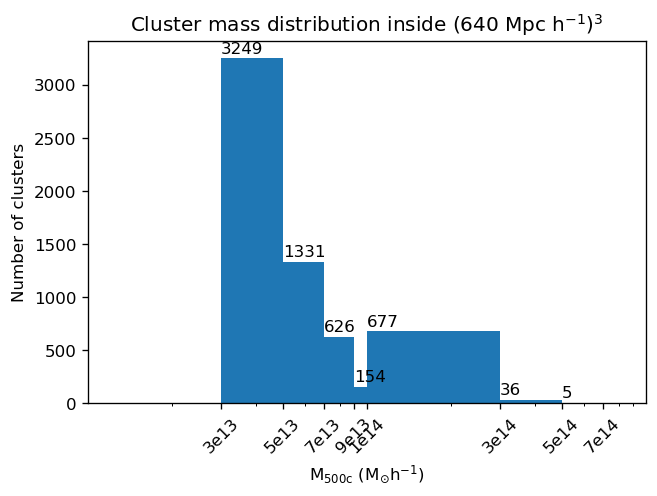

In [5]:
plt.figure(dpi = dpi)

bins = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
hist_data = plt.hist(df_clusters_orig['m500c[Msol/h]'],  bins = bins)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (640 Mpc h$^{-1}$)$^3$');

bins = ['3e13', '5e13', '7e13', '9e13', '1e14', '3e14', '5e14', '7e14']
plt.xticks(hist_data[1], bins, rotation = 45)
# plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylim(0,200)
print(hist_data)
for i in range(len(hist_data[0])):
    plt.text(hist_data[1][i],hist_data[0][i]+50,str(int(hist_data[0][i])));

In [6]:
np.geomspace(3e13, 7e14, num = 8)

array([3.00000000e+13, 4.70485789e+13, 7.37856258e+13, 1.15716961e+14,
       1.81477286e+14, 2.84608279e+14, 4.46347169e+14, 7.00000000e+14])

(array([2933., 1803.,  833.,  330.,  130.,   39.,   10.]), array([3.00000000e+13, 4.70485789e+13, 7.37856258e+13, 1.15716961e+14,
       1.81477286e+14, 2.84608279e+14, 4.46347169e+14, 7.00000000e+14]), <BarContainer object of 7 artists>)


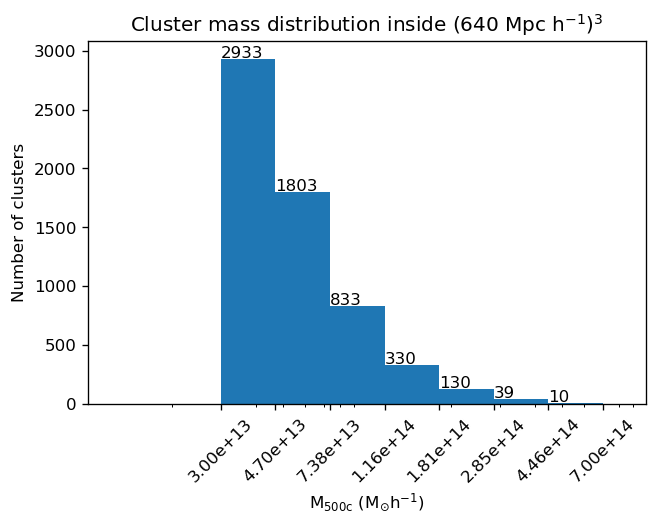

In [7]:
plt.figure(dpi = dpi)

bins = np.geomspace(3e13, 7e14, num = 8)
hist_data = plt.hist(df_clusters_orig['m500c[Msol/h]'],  bins = bins)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (640 Mpc h$^{-1}$)$^3$');

bins_str = ['{:.2e}'.format(i) for i in bins]
plt.xticks(hist_data[1], bins_str, rotation = 45)
# plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylim(0,200)
print(hist_data)
for i in range(len(hist_data[0])):
    plt.text(hist_data[1][i],hist_data[0][i]+10,str(int(hist_data[0][i])));

In [8]:
df_clusters_temp = df_clusters_orig.copy()

df_clusters_big = pd.DataFrame()

for k in range(3):
    for i in range(3):
        for j in range(0,3):

            df_clusters_temp['x[kpc/h]'] = df_clusters_orig['x[kpc/h]'] + (640000 * i)
            df_clusters_temp['y[kpc/h]'] = df_clusters_orig['y[kpc/h]'] + (640000 * j)
            df_clusters_temp['z[kpc/h]'] = df_clusters_orig['z[kpc/h]'] + (640000 * k)

            df_clusters_big = df_clusters_big.append(df_clusters_temp)

df_clusters_big.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,1.641600e+05,1.641600e+05,1.641600e+05,1.641600e+05,164160.000000,164160.000000,164160.000000
mean,9.664164e+05,9.620554e+05,9.613082e+05,6.356245e+13,2.109102,-1.647297,-4.296055
std,5.546773e+05,5.535561e+05,5.538918e+05,4.851314e+13,316.039508,306.202286,286.431703
min,1.916329e+01,1.526539e+02,8.737095e+01,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,4.863366e+05,4.736062e+05,4.789278e+05,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,9.788846e+05,9.732743e+05,9.621101e+05,4.801630e+13,-3.619450,1.969450,-8.055475
75%,1.440918e+06,1.444771e+06,1.441655e+06,6.945502e+13,206.816750,207.755750,181.532000
max,1.919888e+06,1.919933e+06,1.919848e+06,7.438200e+14,1197.640000,1164.960000,1201.260000


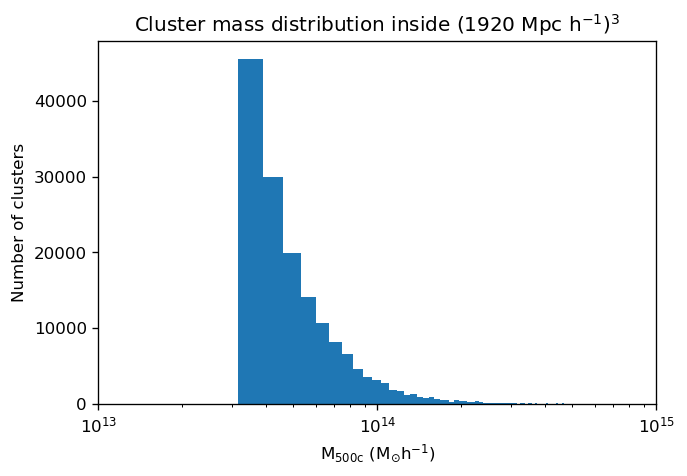

In [9]:
plt.figure(dpi = dpi)
plt.hist(df_clusters_big['m500c[Msol/h]'],  bins = 100)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (1920 Mpc h$^{-1}$)$^3$');

In [10]:
low_bound = 640000
upp_bound = 640000 * 2  #128000

df_clusters_center = df_clusters_big[(df_clusters_big['x[kpc/h]'] > low_bound) & 
                                     (df_clusters_big['x[kpc/h]'] < upp_bound) & 
                                     (df_clusters_big['y[kpc/h]'] > low_bound) & 
                                     (df_clusters_big['y[kpc/h]'] < upp_bound) & 
                                     (df_clusters_big['z[kpc/h]'] > low_bound) & 
                                     (df_clusters_big['z[kpc/h]'] < upp_bound)]

df_clusters_center.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,6.080000e+03,6.080000e+03,6.080000e+03,6.080000e+03,6080.000000,6080.000000,6080.000000
mean,9.664164e+05,9.620554e+05,9.613082e+05,6.356245e+13,2.109102,-1.647297,-4.296055
std,1.860216e+05,1.826509e+05,1.836659e+05,4.851698e+13,316.064539,306.226537,286.454388
min,6.400192e+05,6.401527e+05,6.400874e+05,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,8.009786e+05,8.047934e+05,8.018639e+05,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,9.788846e+05,9.732743e+05,9.621101e+05,4.801630e+13,-3.619450,1.969450,-8.055475
75%,1.126228e+06,1.113557e+06,1.118894e+06,6.945502e+13,206.816750,207.755750,181.532000
max,1.279888e+06,1.279933e+06,1.279848e+06,7.438200e+14,1197.640000,1164.960000,1201.260000


In [11]:
df_gal_orig = pd.read_csv(data_address + 'massive_galaxies.csv')      #massive_galaxies.csv contains galaxies with mass greater than 1.8 ×10^{11} h^{−1} M_sun as done by Tanimura et al. (2020)
df_gal_orig.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],m_gas[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,93097.000000,93097.000000,93097.000000,9.309700e+04,9.309700e+04,93097.000000,93097.000000,93097.000000
mean,325576.133087,322500.028738,320613.762863,3.993206e+11,1.326202e+12,0.763965,0.349477,-0.509183
std,184863.273960,182799.587421,183249.915097,3.995129e+11,2.955465e+12,351.345586,343.572230,328.125457
min,1.864417,10.164207,0.260974,1.800010e+11,0.000000e+00,-2896.388700,-2323.086700,-2275.444800
25%,163866.950000,166201.380000,162514.560000,2.161480e+11,2.976010e+11,-219.363920,-215.157970,-201.740720
50%,332449.620000,329260.160000,319925.780000,2.784900e+11,5.810010e+11,-2.822351,2.646382,-3.028148
75%,483949.000000,475466.120000,478698.410000,4.192930e+11,1.244070e+12,216.770710,214.257250,200.506210
max,639996.190000,639980.940000,639993.120000,1.077460e+13,1.420090e+14,2423.330800,3048.129900,2638.449000


In [12]:
df_gal_temp = df_gal_orig.copy()

df_gal_big = pd.DataFrame()

for k in range(3):
    for i in range(3):
        for j in range(0,3):

            df_gal_temp['x[kpc/h]'] = df_gal_orig['x[kpc/h]'] + (640000 * i)
            df_gal_temp['y[kpc/h]'] = df_gal_orig['y[kpc/h]'] + (640000 * j)
            df_gal_temp['z[kpc/h]'] = df_gal_orig['z[kpc/h]'] + (640000 * k)

            df_gal_big = df_gal_big.append(df_gal_temp)

df_gal_big.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],m_gas[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,2.513619e+06,2.513619e+06,2.513619e+06,2.513619e+06,2.513619e+06,2.513619e+06,2.513619e+06,2.513619e+06
mean,9.655761e+05,9.625000e+05,9.606138e+05,3.993206e+11,1.326202e+12,7.639653e-01,3.494774e-01,-5.091831e-01
std,5.542931e+05,5.536083e+05,5.537571e+05,3.995109e+11,2.955449e+12,3.513438e+02,3.435705e+02,3.281238e+02
min,1.864417e+00,1.016421e+01,2.609741e-01,1.800010e+11,0.000000e+00,-2.896389e+03,-2.323087e+03,-2.275445e+03
25%,4.839490e+05,4.754661e+05,4.786984e+05,2.161480e+11,2.976010e+11,-2.193639e+02,-2.151580e+02,-2.017407e+02
50%,9.724496e+05,9.692602e+05,9.599258e+05,2.784900e+11,5.810010e+11,-2.822351e+00,2.646382e+00,-3.028148e+00
75%,1.443867e+06,1.446201e+06,1.442515e+06,4.192930e+11,1.244070e+12,2.167707e+02,2.142572e+02,2.005062e+02
max,1.919996e+06,1.919981e+06,1.919993e+06,1.077460e+13,1.420090e+14,2.423331e+03,3.048130e+03,2.638449e+03


In [14]:
df_gal_big['vx[km/s]'] = df_gal_big['vx[km/s]'] - df_gal_big['vx[km/s]'].mean()
df_gal_big['vy[km/s]'] = df_gal_big['vy[km/s]'] - df_gal_big['vy[km/s]'].mean()
df_gal_big['vz[km/s]'] = df_gal_big['vz[km/s]'] - df_gal_big['vz[km/s]'].mean()

df_gal_big.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],m_gas[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,2.513619e+06,2.513619e+06,2.513619e+06,2.513619e+06,2.513619e+06,2.513619e+06,2.513619e+06,2.513619e+06
mean,9.655761e+05,9.625000e+05,9.606138e+05,3.993206e+11,1.326202e+12,1.561167e-15,-2.499907e-15,-1.047210e-13
std,5.542931e+05,5.536083e+05,5.537571e+05,3.995109e+11,2.955449e+12,3.513438e+02,3.435705e+02,3.281238e+02
min,1.864417e+00,1.016421e+01,2.609741e-01,1.800010e+11,0.000000e+00,-2.897153e+03,-2.323436e+03,-2.274936e+03
25%,4.839490e+05,4.754661e+05,4.786984e+05,2.161480e+11,2.976010e+11,-2.201279e+02,-2.155074e+02,-2.012315e+02
50%,9.724496e+05,9.692602e+05,9.599258e+05,2.784900e+11,5.810010e+11,-3.586317e+00,2.296904e+00,-2.518965e+00
75%,1.443867e+06,1.446201e+06,1.442515e+06,4.192930e+11,1.244070e+12,2.160067e+02,2.139078e+02,2.010154e+02
max,1.919996e+06,1.919981e+06,1.919993e+06,1.077460e+13,1.420090e+14,2.422567e+03,3.047780e+03,2.638958e+03


In [16]:
def bulk_velocity_with_mass_mag_only(gray_shade, low_lim, upper_lim, df_clusters_inner):
    
#     print(df_clusters_inner.describe())
    
    max_extent = 640000
    
#     radi = np.arange(10000, max_extent + 1, 10000)
    radi = np.arange(200, 2000 + 1, 200)

    v_bulk_x = np.zeros(radi.shape)
    v_bulk_y = np.zeros(radi.shape)
    v_bulk_z = np.zeros(radi.shape)
        
    v_bulk_mag = np.zeros((n_clusters, radi.shape[0]))
    
    random_clusters = df_clusters_inner.sample(n = n_clusters, replace = False, random_state = 0)
    
    random_clusters = random_clusters.reset_index(drop = True)
    
#     print(random_clusters)
      
    for j, random_cluster in random_clusters.iterrows():
        
#         random_cluster = df_clusters_inner.sample(replace=False)
        
#         used_clusters = pd.DataFrame({'x[kpc/h]': -1}, index = [0])
#         while random_cluster['x[kpc/h]'] in used_clusters['x[kpc/h]']:
#             print(random_cluster['x[kpc/h]'].iloc[0])
#             used_clusters.append(random_cluster)
#             random_cluster = df_clusters_inner.sample()
        
#         print(j)

        df_gal_cube = df_gal_big[
                            (df_gal_big['x[kpc/h]'] > (random_cluster['x[kpc/h]'] - max_extent)) & 
                            (df_gal_big['x[kpc/h]'] < (random_cluster['x[kpc/h]'] + max_extent)) & 
                            (df_gal_big['y[kpc/h]'] > (random_cluster['y[kpc/h]'] - max_extent)) & 
                            (df_gal_big['y[kpc/h]'] < (random_cluster['y[kpc/h]'] + max_extent)) & 
                            (df_gal_big['z[kpc/h]'] > (random_cluster['z[kpc/h]'] - max_extent)) & 
                            (df_gal_big['z[kpc/h]'] < (random_cluster['z[kpc/h]'] + max_extent))
                                            ]

        df_gal_cube.insert(3, 'x_shift[kpc/h]', df_gal_cube['x[kpc/h]'] - random_cluster['x[kpc/h]'])
        df_gal_cube.insert(4, 'y_shift[kpc/h]', df_gal_cube['y[kpc/h]'] - random_cluster['y[kpc/h]'])
        df_gal_cube.insert(5, 'z_shift[kpc/h]', df_gal_cube['z[kpc/h]'] - random_cluster['z[kpc/h]'])


        df_gal_cube.insert(6, 'dist_from_clus', np.sqrt(df_gal_cube['x_shift[kpc/h]']**2 + 
                                                        df_gal_cube['y_shift[kpc/h]']**2 +
                                                        df_gal_cube['z_shift[kpc/h]']**2))


  


        for i, r in enumerate(radi):

            df_gal_sphere = df_gal_cube[df_gal_cube['dist_from_clus'] <= r]

    
            v_bulk_x[i] = (np.sum(df_gal_sphere['vx[km/s]'] * df_gal_sphere['m[Msol/h]']) / 
                               np.sum(df_gal_sphere['m[Msol/h]']))


            v_bulk_y[i] = (np.sum(df_gal_sphere['vy[km/s]'] * df_gal_sphere['m[Msol/h]']) / 
                               np.sum(df_gal_sphere['m[Msol/h]']))


            v_bulk_z[i] = (np.sum(df_gal_sphere['vz[km/s]'] * df_gal_sphere['m[Msol/h]']) / 
                               np.sum(df_gal_sphere['m[Msol/h]']))



        v_bulk_mag[j,:] = np.sqrt(v_bulk_x**2 + v_bulk_y**2 + v_bulk_z**2)
    
    
    plt.plot(radi/1e3, v_bulk_mag.mean(axis = 0), 
#              c = gray_shade,
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')   
    
#     plt.xlim(0, max_extent/1e3)
    

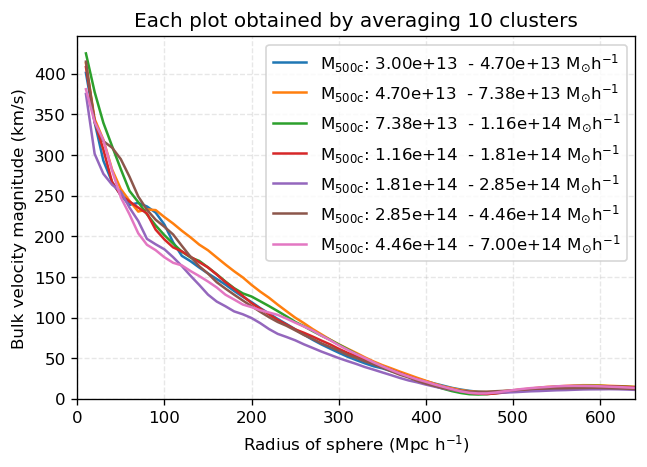

In [156]:
plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

# mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
# mass_ranges = [5e14, 7e14]
mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 10

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    bulk_velocity_with_mass_mag_only(gray_shades[i],mass_ranges[i], mass_ranges[i+1],
                            df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                               (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Bulk velocity magnitude (km/s)')
plt.legend()
plt.ylim(0, )



plt.title(f'Each plot obtained by averaging {n_clusters} clusters');

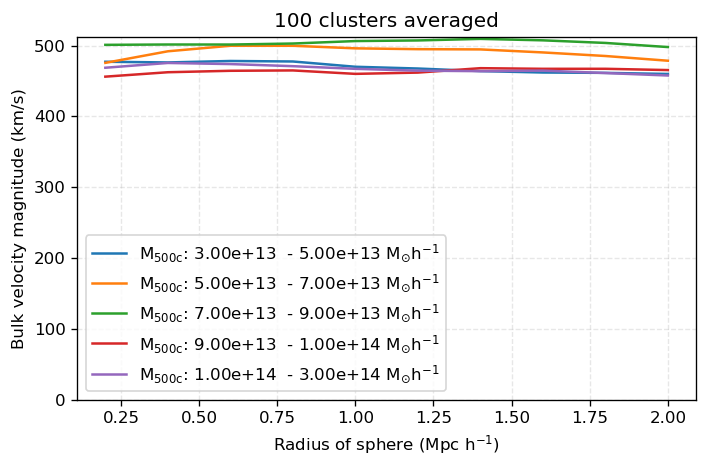

In [17]:
plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    bulk_velocity_with_mass_mag_only(gray_shades[i],mass_ranges[i], mass_ranges[i+1],
                            df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                               (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Bulk velocity magnitude (km/s)')
plt.legend()
plt.ylim(0, )



plt.title(f'{n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

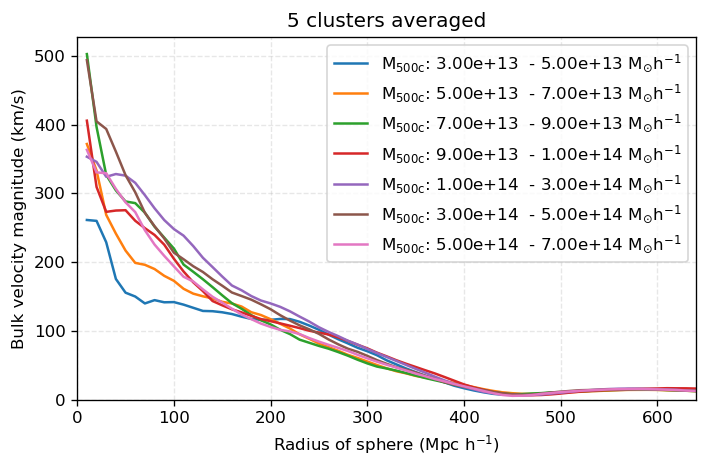

In [15]:
plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 5

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    bulk_velocity_with_mass_mag_only(gray_shades[i],mass_ranges[i], mass_ranges[i+1],
                            df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                               (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Bulk velocity magnitude (km/s)')
plt.legend()
plt.ylim(0, )



plt.title(f'{n_clusters} clusters averaged');
plt.tight_layout()
plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 4min 6s, sys: 24.8 s, total: 4min 31s
Wall time: 2min 39s


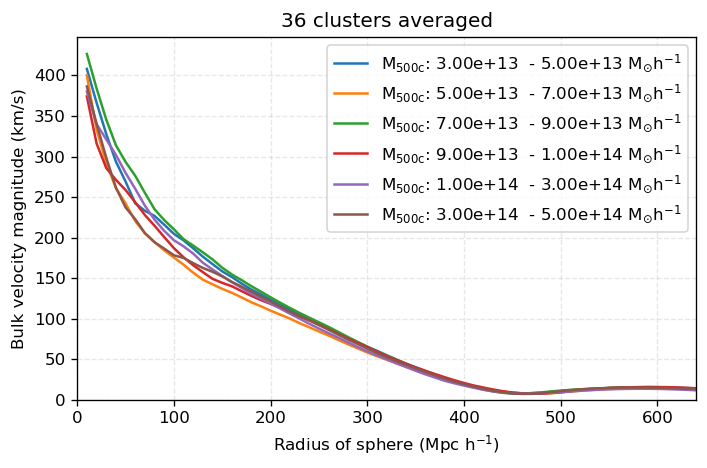

In [16]:
%%time
plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 36

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    bulk_velocity_with_mass_mag_only(gray_shades[i],mass_ranges[i], mass_ranges[i+1],
                            df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                               (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Bulk velocity magnitude (km/s)')
plt.legend()
plt.ylim(0, )



plt.title(f'{n_clusters} clusters averaged');
plt.tight_layout()
plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 13min 40s, sys: 1min 18s, total: 14min 58s
Wall time: 8min 55s


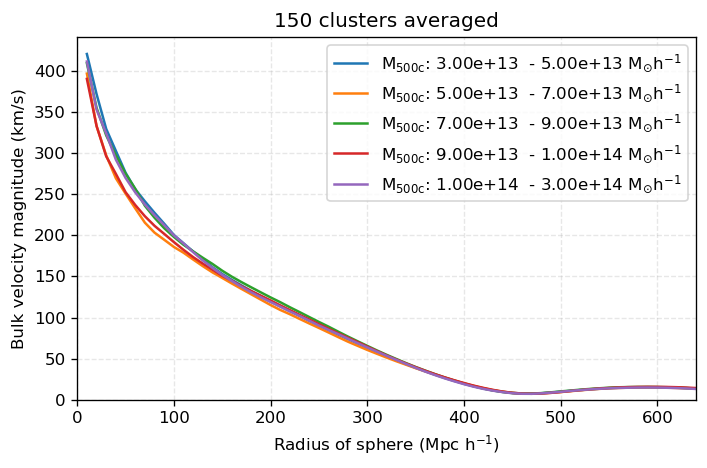

In [17]:
%%time
plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 150

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    bulk_velocity_with_mass_mag_only(gray_shades[i],mass_ranges[i], mass_ranges[i+1],
                            df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                               (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Bulk velocity magnitude (km/s)')
plt.legend()
plt.ylim(0, )



plt.title(f'{n_clusters} clusters averaged');
plt.tight_layout()
plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')